In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/"My Drive/Colab Notebooks/Linear regression"

/content/drive/My Drive/Colab Notebooks/Linear regression


In [ ]:
columnname = ['X','Y','Z']
dataset=pd.read_csv("ex2data1.csv",names=columnname)
print(dataset)
print(dataset.shape)

            X          Y  Z
0   34.623660  78.024693  0
1   30.286711  43.894998  0
2   35.847409  72.902198  0
3   60.182599  86.308552  1
4   79.032736  75.344376  1
..        ...        ... ..
95  83.489163  48.380286  1
96  42.261701  87.103851  1
97  99.315009  68.775409  1
98  55.340018  64.931938  1
99  74.775893  89.529813  1

[100 rows x 3 columns]
(100, 3)


In [ ]:
dataset.describe()

,X,Y,Z
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [ ]:
X = dataset.iloc[:,:-1].values
X

array([[34.62365962, 78.02469282],
       [30.28671077, 43.89499752],
       [35.84740877, 72.90219803],
       [60.18259939, 86.3085521 ],
       [79.03273605, 75.34437644],
       [45.08327748, 56.31637178],
       [61.10666454, 96.51142588],
       [75.02474557, 46.55401354],
       [76.0987867 , 87.42056972],
       [84.43281996, 43.53339331],
       [95.86155507, 38.22527806],
       [75.01365839, 30.60326323],
       [82.30705337, 76.4819633 ],
       [69.36458876, 97.71869196],
       [39.53833914, 76.03681085],
       [53.97105215, 89.20735014],
       [69.07014406, 52.74046973],
       [67.94685548, 46.67857411],
       [70.66150955, 92.92713789],
       [76.97878373, 47.57596365],
       [67.37202755, 42.83843832],
       [89.67677575, 65.79936593],
       [50.53478829, 48.85581153],
       [34.21206098, 44.2095286 ],
       [77.92409145, 68.97235999],
       [62.27101367, 69.95445795],
       [80.19018075, 44.82162893],
       [93.1143888 , 38.80067034],
       [61.83020602,

In [ ]:
Y= dataset.iloc[:,-1].values
Y

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
pos,neg=(Y==1).reshape(100,1),(Y==0).reshape(100,1)  #pos=postive , neg = negative class

In [ ]:
neg

array([[ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [

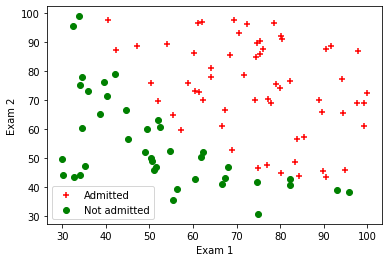

In [ ]:
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c='r',marker='+')
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c='g',marker='o')
plt.xlabel("Exam 1")
plt.ylabel("Exam 2")
plt.legend(["Admitted","Not admitted"],loc=0)

In [ ]:
def sigmoid(z):
    return(1/(1+np.exp(-z)))

In [ ]:
sigmoid(0)

0.5

In [ ]:
def feature_normalization(X):
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    X_norm=(X-mean)/std
    return X_norm,mean,std

    #it multiplies or (dot product) 1/1-(e^(-theta*x) )   theta*x for ease of calculations 
    #our h(theta of x) = prediction so we can put in cost function predictions instead of h(theta of x) in error equation below
    grad = 1/m * np.dot(X.transpose(),(predictions-Y))       #X=(100,2) predictions-Y=(100,1) transpose we have taken because we cannot multiply x,y directly



In [ ]:
def costFunction(X,Y,theta):
    m=len(Y)
    error=0
    for i in range(m):
        predictions = sigmoid(np.dot(X[i],theta))
        error = error + ((Y[i] * np.log(predictions))-((1-Y[i]) * np.log(1-predictions)))
    cost = 1/m * error
    grad = 1/m * np.dot(X.transpose(),(predictions-Y))        #X=(100,2)  prediction-y(100,1)
    print(cost)
    return cost,grad

In [ ]:
m,n=X.shape[0],X.shape[1]
X,X_mean,X_std=feature_normalization(X)
X=np.append(np.ones((m,1)),X,axis=1)
Y=Y.reshape(m,1)
initial_theta = np.zeros((n+1,1))
costFunction(X,Y,initial_theta)

[-0.13862944]


(array([-0.13862944]), array([[-0.1       ],
        [-0.28122914],
        [-0.25098615]]))

In [ ]:
def gradientDescent(X,Y,theta,alpha,num_iters):
    m=len(Y)
    cost_function_Values= []

    for i in range(num_iters):
        cost,grad = costFunction(X,Y,theta)
        cost_function_Values.append(cost)
        theta = theta - (alpha*grad)

        if(i%10==0):
            plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker='+')
            plt.scatter(X[neg[:,0],1],X[neg[:,0],2],marker='o',c="b",s=10)
            x_value = np.array([np.min(X[:,1]),np.max(X[:,1])])
            y_value = -(theta[0]+theta[1]*x_value)/theta[2]
            plt.plot(x_value,y_value,"g")
            plt.xlabel("Exam 1")
            plt.ylabel("Exam 2")
            plt.legend(["Admitted","Not Admitted"],loc=0)
            plt.show()
    x=np.arange(0,len(cost_function_Values),step=1)
    plt.plot(x,cost_function_Values,"-b")
    plt.xlabel("number of iteration")
    plt.ylabel("Cost/loss values")
    plt.title("cost Function curve")
    plt.show()
    return theta,cost_function_Values

In [ ]:
X.shape

(100, 3)

[-0.13862944]


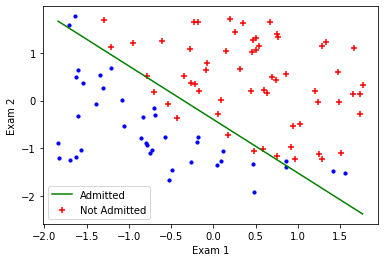

[-0.1381302]
[-0.13763933]
[-0.13715678]
[-0.1366825]
[-0.13621644]
[-0.13575855]
[-0.13530879]
[-0.13486711]
[-0.13443345]
[-0.13400778]


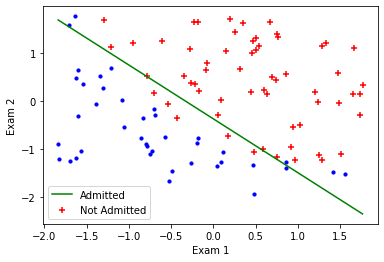

[-0.13359004]
[-0.13318018]
[-0.13277816]
[-0.13238393]
[-0.13199744]
[-0.13161864]
[-0.13124749]
[-0.13088394]
[-0.13052794]
[-0.13017944]


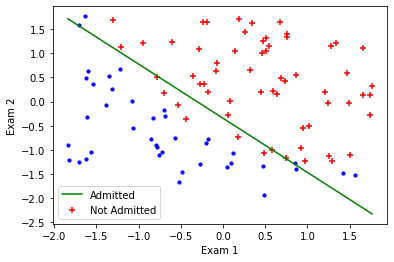

[-0.1298384]
[-0.12950477]
[-0.1291785]
[-0.12885954]
[-0.12854786]
[-0.12824339]
[-0.12794611]
[-0.12765595]
[-0.12737287]
[-0.12709683]


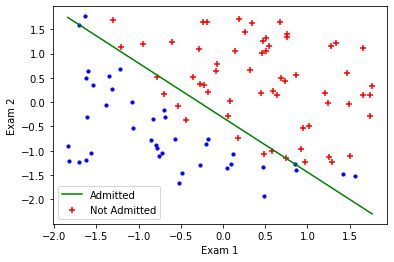

[-0.12682777]
[-0.12656567]
[-0.12631046]
[-0.1260621]
[-0.12582055]
[-0.12558576]
[-0.12535768]
[-0.12513628]
[-0.1249215]
[-0.12471331]


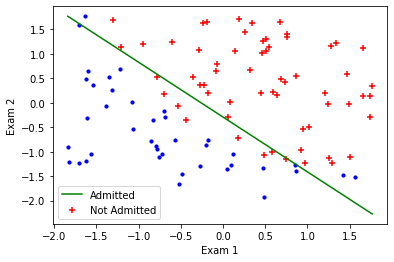

[-0.12451165]
[-0.12431647]
[-0.12412775]
[-0.12394543]
[-0.12376946]
[-0.12359981]
[-0.12343643]
[-0.12327928]
[-0.12312831]
[-0.12298348]


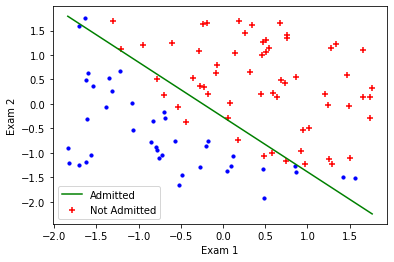

[-0.12284474]
[-0.12271205]
[-0.12258538]
[-0.12246467]
[-0.12234988]
[-0.12224098]
[-0.12213791]
[-0.12204065]
[-0.12194913]
[-0.12186333]


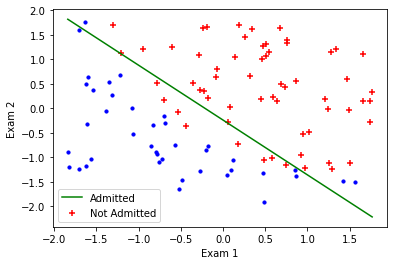

[-0.1217832]
[-0.1217087]
[-0.12163979]
[-0.12157643]
[-0.12151857]
[-0.12146618]
[-0.12141921]
[-0.12137763]
[-0.12134139]
[-0.12131046]


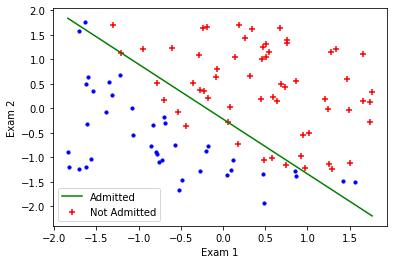

[-0.12128478]
[-0.12126434]
[-0.12124907]
[-0.12123896]
[-0.12123395]
[-0.121234]
[-0.12123909]
[-0.12124916]
[-0.12126419]
[-0.12128412]


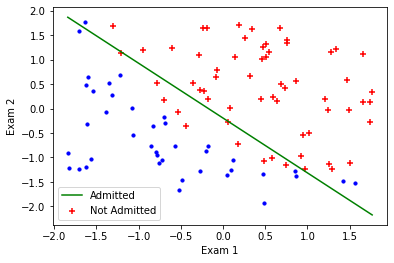

[-0.12130894]
[-0.12133859]
[-0.12137304]
[-0.12141225]
[-0.12145618]
[-0.1215048]
[-0.12155808]
[-0.12161596]
[-0.12167842]
[-0.12174543]


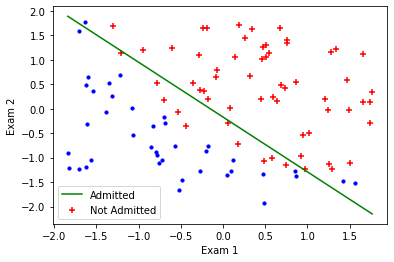

[-0.12181693]
[-0.12189291]
[-0.12197332]
[-0.12205813]
[-0.12214729]
[-0.12224079]
[-0.12233857]
[-0.12244061]
[-0.12254688]
[-0.12265733]


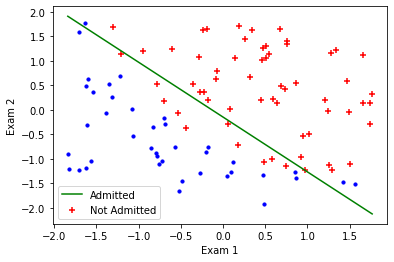

[-0.12277193]
[-0.12289066]
[-0.12301347]
[-0.12314033]
[-0.12327121]
[-0.12340607]
[-0.12354489]
[-0.12368762]
[-0.12383424]
[-0.12398472]


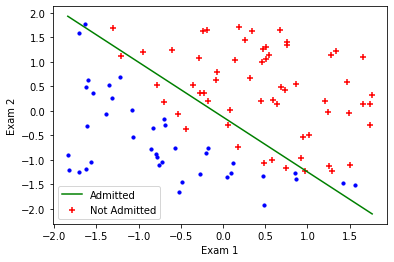

[-0.12413902]
[-0.1242971]
[-0.12445895]
[-0.12462452]
[-0.12479378]
[-0.12496671]
[-0.12514327]
[-0.12532343]
[-0.12550717]
[-0.12569444]


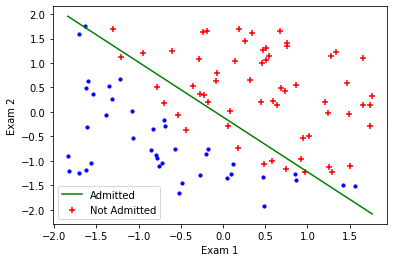

[-0.12588522]
[-0.12607948]
[-0.12627719]
[-0.12647832]
[-0.12668284]
[-0.12689073]
[-0.12710194]
[-0.12731646]
[-0.12753425]
[-0.12775528]


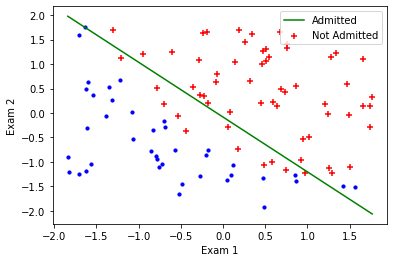

[-0.12797953]
[-0.12820698]
[-0.12843758]
[-0.12867131]
[-0.12890816]
[-0.12914807]
[-0.12939104]
[-0.12963704]
[-0.12988603]
[-0.13013799]


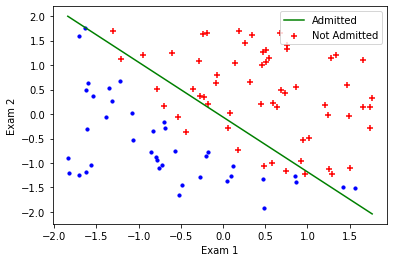

[-0.13039289]
[-0.13065071]
[-0.13091143]
[-0.131175]
[-0.13144142]
[-0.13171065]
[-0.13198267]
[-0.13225745]
[-0.13253498]
[-0.13281521]


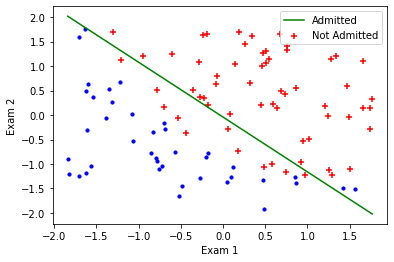

[-0.13309813]
[-0.13338372]
[-0.13367195]
[-0.1339628]
[-0.13425623]
[-0.13455224]
[-0.13485079]
[-0.13515186]
[-0.13545543]
[-0.13576148]


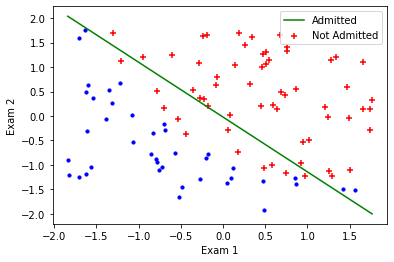

[-0.13606998]
[-0.1363809]
[-0.13669424]
[-0.13700996]
[-0.13732804]
[-0.13764847]
[-0.13797121]
[-0.13829625]
[-0.13862357]
[-0.13895314]


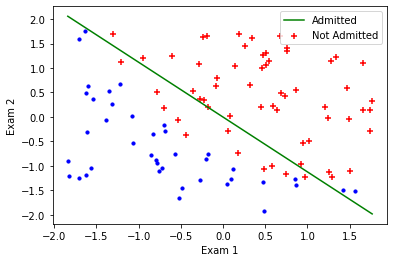

[-0.13928495]
[-0.13961896]
[-0.13995517]
[-0.14029356]
[-0.14063409]
[-0.14097675]
[-0.14132153]
[-0.14166839]
[-0.14201732]
[-0.14236831]


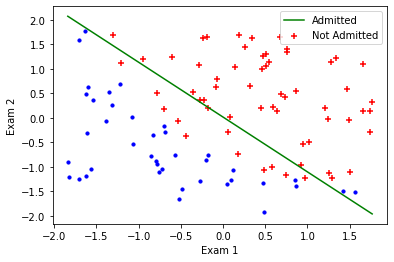

[-0.14272133]
[-0.14307636]
[-0.14343339]
[-0.14379239]
[-0.14415334]
[-0.14451623]
[-0.14488104]
[-0.14524775]
[-0.14561635]
[-0.1459868]


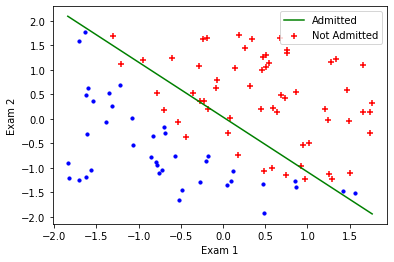

[-0.14635911]
[-0.14673324]
[-0.14710918]
[-0.14748692]
[-0.14786643]
[-0.1482477]
[-0.14863072]
[-0.14901546]
[-0.14940191]
[-0.14979005]


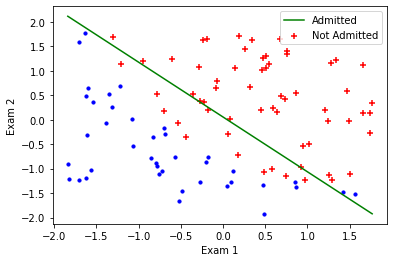

[-0.15017987]
[-0.15057134]
[-0.15096447]
[-0.15135921]
[-0.15175558]
[-0.15215353]
[-0.15255307]
[-0.15295418]
[-0.15335683]
[-0.15376103]


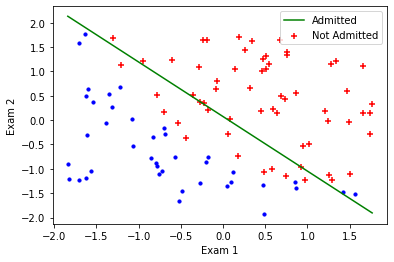

[-0.15416674]
[-0.15457396]
[-0.15498267]
[-0.15539285]
[-0.1558045]
[-0.1562176]
[-0.15663213]
[-0.15704808]
[-0.15746543]
[-0.15788418]


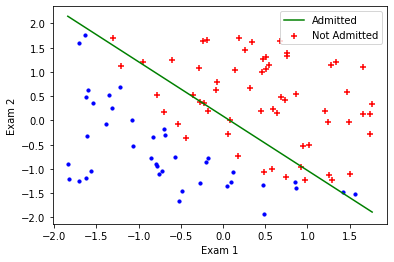

[-0.15830431]
[-0.15872581]
[-0.15914865]
[-0.15957284]
[-0.15999835]
[-0.16042518]
[-0.1608533]
[-0.16128272]
[-0.1617134]
[-0.16214536]


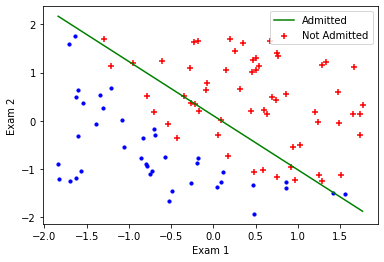

[-0.16257856]
[-0.163013]
[-0.16344866]
[-0.16388555]
[-0.16432363]
[-0.1647629]
[-0.16520336]
[-0.16564498]
[-0.16608776]
[-0.16653168]


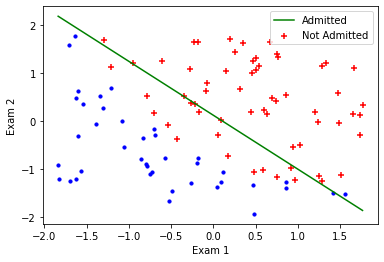

[-0.16697674]
[-0.16742292]
[-0.16787021]
[-0.16831861]
[-0.16876809]
[-0.16921866]
[-0.16967029]
[-0.17012299]
[-0.17057674]
[-0.17103152]


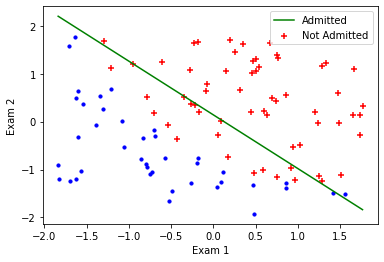

[-0.17148733]
[-0.17194417]
[-0.17240201]
[-0.17286085]
[-0.17332069]
[-0.1737815]
[-0.17424329]
[-0.17470604]
[-0.17516974]
[-0.17563439]


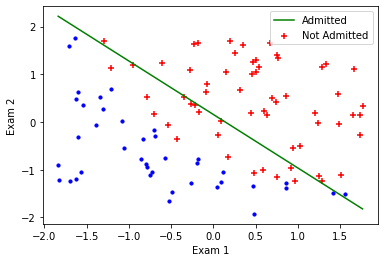

[-0.17609997]
[-0.17656647]
[-0.1770339]
[-0.17750223]
[-0.17797147]
[-0.17844159]
[-0.1789126]
[-0.17938449]
[-0.17985724]
[-0.18033085]


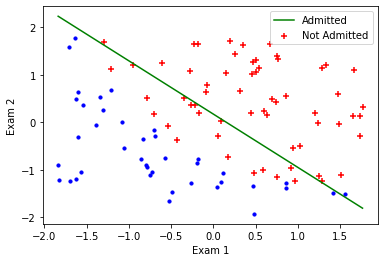

[-0.18080531]
[-0.18128062]
[-0.18175676]
[-0.18223373]
[-0.18271152]
[-0.18319011]
[-0.18366952]
[-0.18414972]
[-0.18463071]
[-0.18511249]


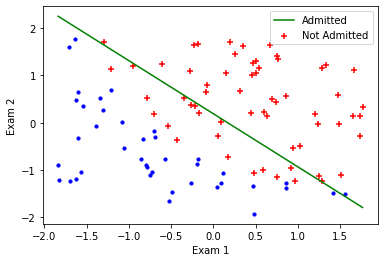

[-0.18559504]
[-0.18607836]
[-0.18656244]
[-0.18704728]
[-0.18753286]
[-0.18801919]
[-0.18850625]
[-0.18899404]
[-0.18948256]
[-0.18997178]


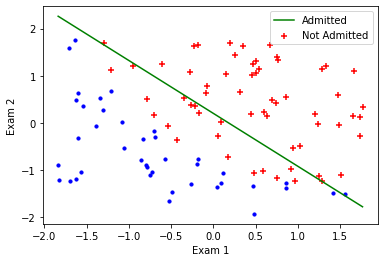

[-0.19046172]
[-0.19095236]
[-0.1914437]
[-0.19193572]
[-0.19242844]
[-0.19292183]
[-0.19341589]
[-0.19391063]
[-0.19440602]
[-0.19490207]


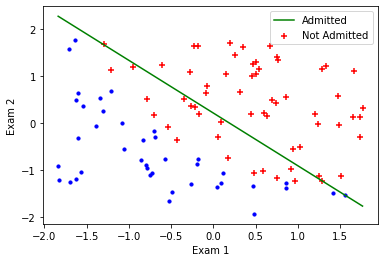

[-0.19539877]
[-0.19589612]
[-0.1963941]
[-0.19689272]
[-0.19739197]
[-0.19789184]
[-0.19839233]
[-0.19889344]
[-0.19939515]
[-0.19989747]


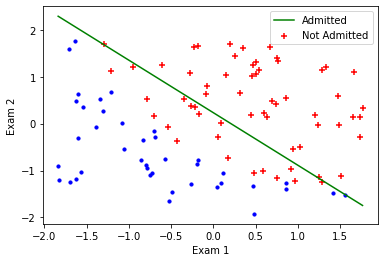

[-0.20040039]
[-0.2009039]
[-0.201408]
[-0.20191268]
[-0.20241795]
[-0.20292379]
[-0.2034302]
[-0.20393718]
[-0.20444472]
[-0.20495282]


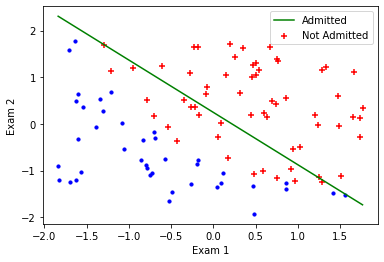

[-0.20546147]
[-0.20597067]
[-0.20648042]
[-0.20699071]
[-0.20750154]
[-0.2080129]
[-0.2085248]
[-0.20903721]
[-0.20955015]
[-0.21006361]


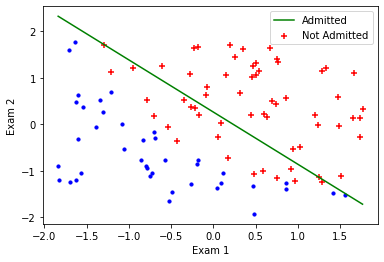

[-0.21057759]
[-0.21109207]
[-0.21160707]
[-0.21212256]
[-0.21263856]
[-0.21315506]
[-0.21367205]
[-0.21418953]
[-0.2147075]
[-0.21522595]


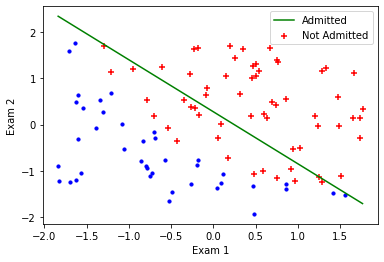

[-0.21574489]
[-0.2162643]
[-0.21678419]
[-0.21730455]
[-0.21782538]
[-0.21834668]
[-0.21886844]
[-0.21939066]
[-0.21991334]
[-0.22043648]


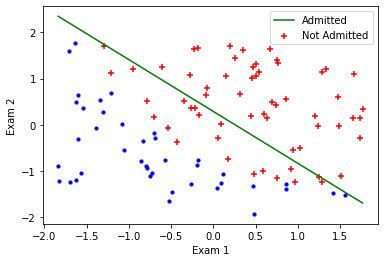

[-0.22096007]
[-0.22148411]
[-0.22200859]
[-0.22253353]
[-0.2230589]
[-0.22358472]
[-0.22411097]
[-0.22463766]
[-0.22516478]
[-0.22569234]


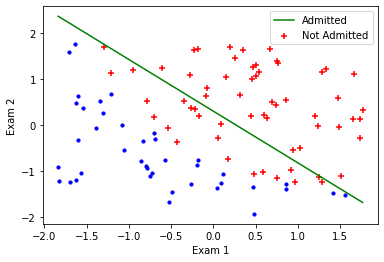

[-0.22622032]
[-0.22674873]
[-0.22727756]
[-0.22780682]
[-0.2283365]
[-0.22886659]
[-0.2293971]
[-0.22992803]
[-0.23045937]
[-0.23099112]


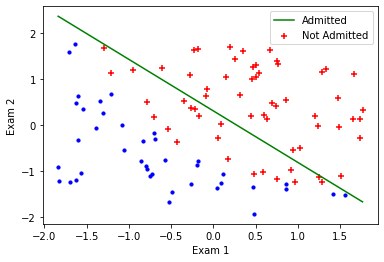

[-0.23152328]
[-0.23205584]
[-0.23258881]
[-0.23312219]
[-0.23365597]
[-0.23419014]
[-0.23472472]
[-0.23525969]
[-0.23579506]
[-0.23633083]


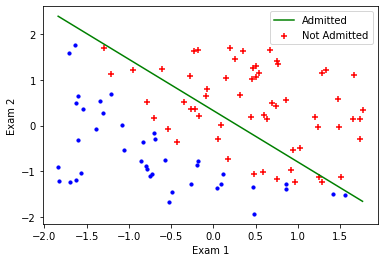

[-0.23686698]
[-0.23740353]
[-0.23794046]
[-0.23847779]
[-0.2390155]
[-0.2395536]
[-0.24009208]
[-0.24063095]
[-0.24117019]
[-0.24170982]


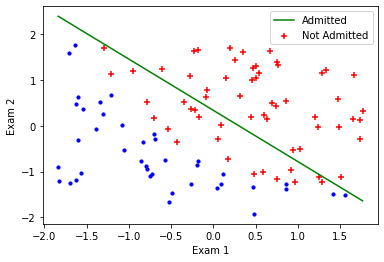

[-0.24224983]
[-0.24279021]
[-0.24333098]
[-0.24387212]
[-0.24441363]
[-0.24495552]
[-0.24549778]
[-0.24604041]
[-0.24658342]
[-0.24712679]


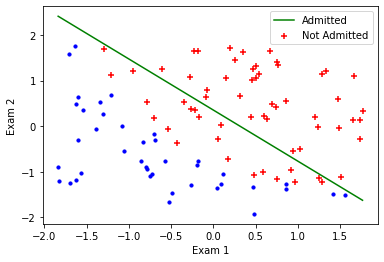

[-0.24767054]
[-0.24821465]
[-0.24875913]
[-0.24930398]
[-0.2498492]
[-0.25039477]
[-0.25094072]
[-0.25148703]
[-0.2520337]
[-0.25258073]


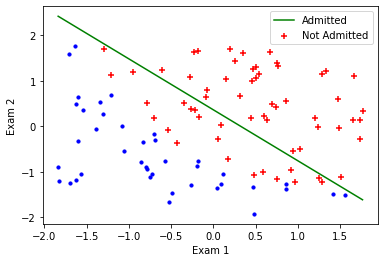

[-0.25312813]
[-0.25367588]
[-0.254224]
[-0.25477248]
[-0.25532131]
[-0.25587051]
[-0.25642006]
[-0.25696998]
[-0.25752025]
[-0.25807087]


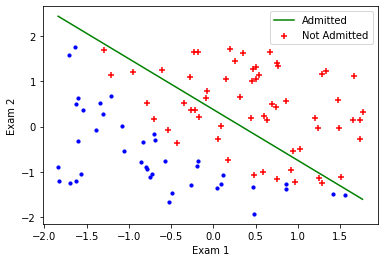

[-0.25862186]
[-0.25917319]
[-0.25972489]
[-0.26027694]
[-0.26082935]
[-0.26138211]
[-0.26193522]
[-0.26248869]
[-0.26304251]
[-0.26359669]


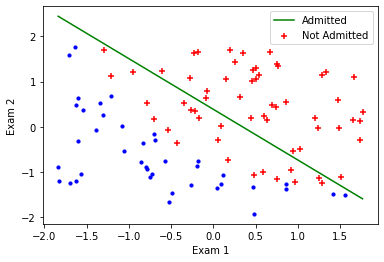

[-0.26415122]
[-0.2647061]
[-0.26526133]
[-0.26581692]
[-0.26637286]
[-0.26692916]
[-0.2674858]
[-0.2680428]
[-0.26860015]
[-0.26915785]


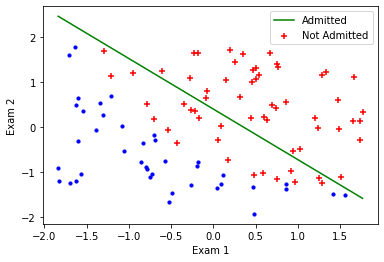

[-0.2697159]
[-0.2702743]
[-0.27083306]
[-0.27139217]
[-0.27195163]
[-0.27251144]
[-0.2730716]
[-0.27363211]
[-0.27419298]
[-0.2747542]


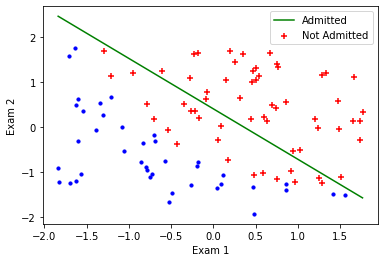

[-0.27531577]
[-0.27587769]
[-0.27643996]
[-0.27700259]
[-0.27756556]
[-0.27812889]
[-0.27869257]
[-0.27925661]
[-0.279821]
[-0.28038574]


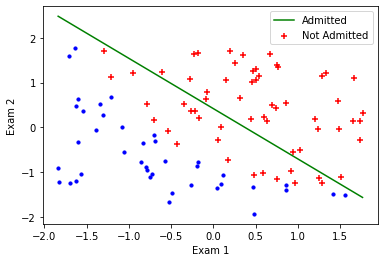

[-0.28095083]
[-0.28151627]
[-0.28208207]
[-0.28264823]
[-0.28321473]
[-0.2837816]
[-0.28434881]
[-0.28491638]
[-0.28548431]
[-0.28605259]


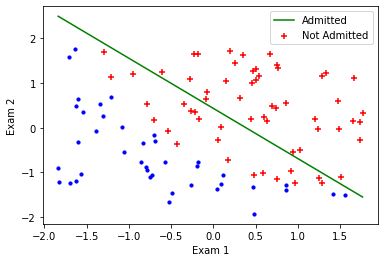

[-0.28662122]
[-0.28719021]
[-0.28775956]
[-0.28832927]
[-0.28889933]
[-0.28946974]
[-0.29004052]
[-0.29061165]
[-0.29118314]
[-0.29175499]


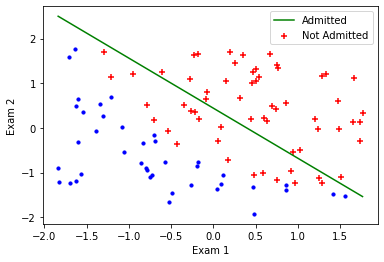

[-0.2923272]
[-0.29289976]
[-0.29347269]
[-0.29404598]
[-0.29461962]
[-0.29519363]
[-0.295768]
[-0.29634273]
[-0.29691782]
[-0.29749327]


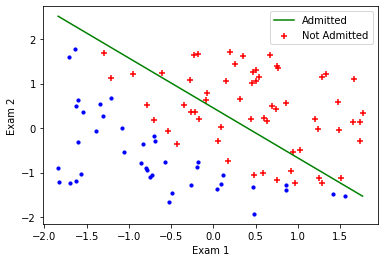

[-0.29806909]
[-0.29864527]
[-0.29922181]
[-0.29979872]
[-0.30037599]
[-0.30095363]
[-0.30153164]
[-0.30211001]
[-0.30268874]


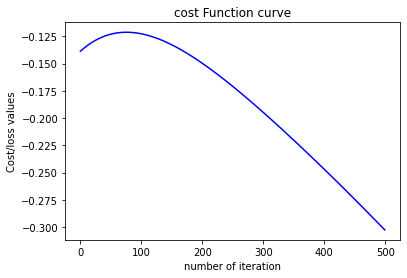

(array([[-0.57737548],
        [ 1.40614568],
        [ 1.25493073]]),
 [array([-0.13862944]),
  array([-0.1381302]),
  array([-0.13763933]),
  array([-0.13715678]),
  array([-0.1366825]),
  array([-0.13621644]),
  array([-0.13575855]),
  array([-0.13530879]),
  array([-0.13486711]),
  array([-0.13443345]),
  array([-0.13400778]),
  array([-0.13359004]),
  array([-0.13318018]),
  array([-0.13277816]),
  array([-0.13238393]),
  array([-0.13199744]),
  array([-0.13161864]),
  array([-0.13124749]),
  array([-0.13088394]),
  array([-0.13052794]),
  array([-0.13017944]),
  array([-0.1298384]),
  array([-0.12950477]),
  array([-0.1291785]),
  array([-0.12885954]),
  array([-0.12854786]),
  array([-0.12824339]),
  array([-0.12794611]),
  array([-0.12765595]),
  array([-0.12737287]),
  array([-0.12709683]),
  array([-0.12682777]),
  array([-0.12656567]),
  array([-0.12631046]),
  array([-0.1260621]),
  array([-0.12582055]),
  array([-0.12558576]),
  array([-0.12535768]),
  array([-0.12513628])

In [ ]:
gradientDescent(X,Y,initial_theta,0.01,500)